In [129]:
#!pip install seaborn
#!pip install scikit-learn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [1]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Read Datasets

In [3]:
#change the path as per your environment
dataset_path="SampleDatasets/"

In [4]:
def read_datasets():
    circle_df = pd.read_csv(dataset_path+"circles0.3.csv")
    moon_df = pd.read_csv(dataset_path+"moons1.csv")
    halfkernel_df = pd.read_csv(dataset_path+"halfkernel.csv")
    spiral_df = pd.read_csv(dataset_path+"spiral1.csv")
    return circle_df,moon_df,halfkernel_df,spiral_df

In [5]:
def plot(df):
    X = df.drop('label', axis='columns')
    y = df['label']
    sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,1],hue=y,style=y,palette='Set1',s=50,legend='full'
) 

In [6]:
circle_df,moon_df,halfkernel_df,spiral_df =read_datasets()

In [7]:
def apply_PCA(df):
    X = df.drop('label', axis='columns')
    y = df['label']

    pca = PCA(n_components=1)
    pca.fit(X)
    pca_features = pca.transform(X)

    # Create dataframe
    X_pca = pd.DataFrame(
        data=pca_features, 
        columns=['feature'])
    
    X_reconstructed = pca.inverse_transform(pca_features)
    
    kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_pred = kmeans.fit_predict(pca_features)

    return X_pca, y_pred, X_reconstructed, y

In [8]:
def apply_kernelPCA(df, gamma):
    X = df.drop('label', axis='columns')
    y = df['label']

    pca = KernelPCA(n_components=1, fit_inverse_transform=True, kernel= "rbf", gamma=gamma)
    pca.fit(X)
    pca_features = pca.transform(X)

    # Create dataframe
    X_pca = pd.DataFrame(
        data=pca_features, 
        columns=['feature'])
    
    X_reconstructed = pca.inverse_transform(pca_features)
    
    kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=50, n_init=10, random_state=0)
    y_pred = kmeans.fit_predict(pca_features)

    return X_pca, y_pred, X_reconstructed, y

In [9]:
sns.set(font_scale=0.75)
def plot_original_space(X,y_pred,y,t, ax):
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_pred,style=y,palette='Set1',s=30,
                    legend=False,ax=ax).set(title=t+' Original Space')

def plot_projected_space(X,y_pred,y,t, ax):
    sns.scatterplot(x=X[:,0],y=y_pred,hue=y_pred,style=y,palette='Set1',s=30,
        legend=False,ax=ax).set(title=t+' Projected Space')

### Circles0.3

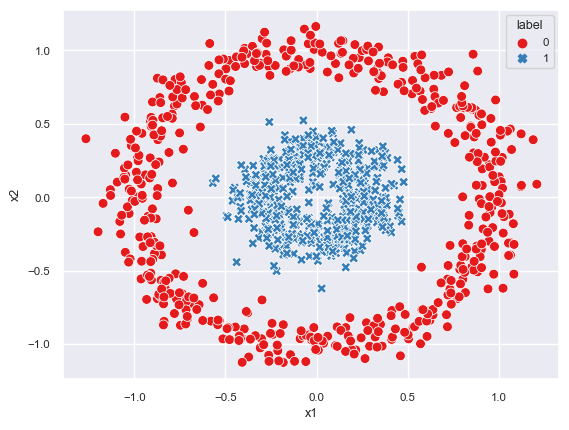

In [10]:
plot(circle_df)

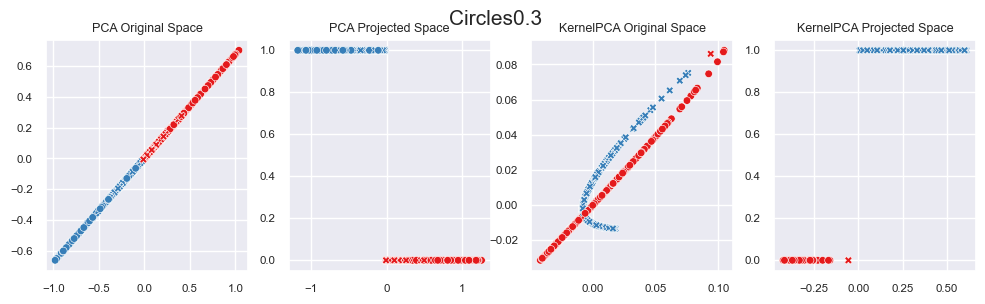

In [20]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

X_pca, y_pred, X_reconstructed, y = apply_PCA(circle_df)
plot_original_space(X_reconstructed,y_pred,y, 'PCA', axs[0])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'PCA', axs[1])

X_pca, y_pred, X_reconstructed, y = apply_kernelPCA(circle_df,3)
plot_original_space(X_reconstructed,y_pred,y,'KernelPCA', axs[2])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'KernelPCA', axs[3])

# plot3(axs[1, 0])
# plot4(axs[1, 1])
fig.suptitle('Circles0.3', fontsize=15)
# Show the plot
plt.show()

### Moons1

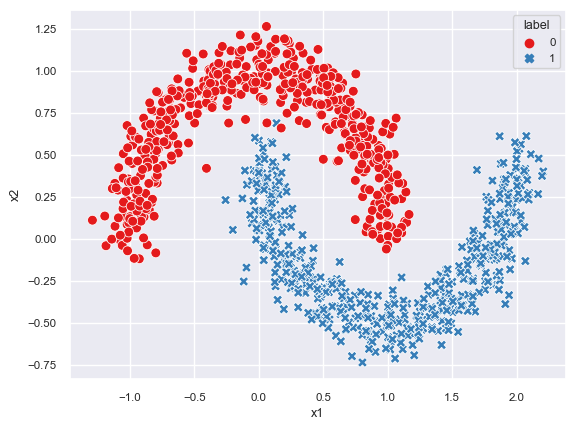

In [21]:
plot(moon_df)

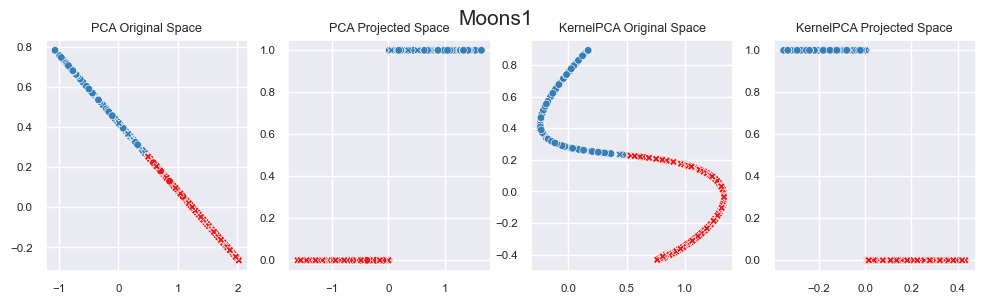

In [23]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

X_pca, y_pred, X_reconstructed, y = apply_PCA(moon_df)
plot_original_space(X_reconstructed,y_pred,y, 'PCA', axs[0])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'PCA', axs[1])

X_pca, y_pred, X_reconstructed, y = apply_kernelPCA(moon_df,13)
plot_original_space(X_reconstructed,y_pred,y,'KernelPCA', axs[2])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'KernelPCA', axs[3])

# plot3(axs[1, 0])
# plot4(axs[1, 1])
fig.suptitle('Moons1', fontsize=15)
# Show the plot
plt.show()

### Halfkernel

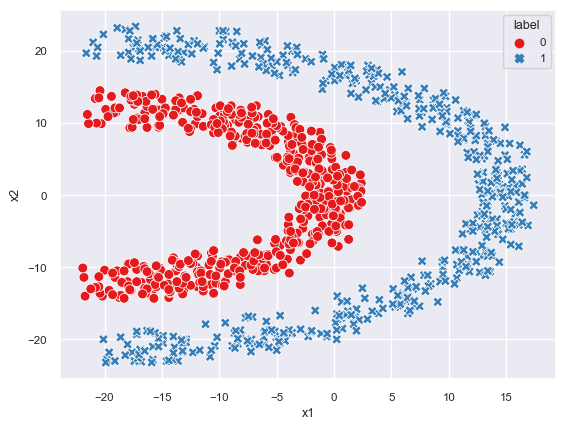

In [60]:
plot(halfkernel_df)

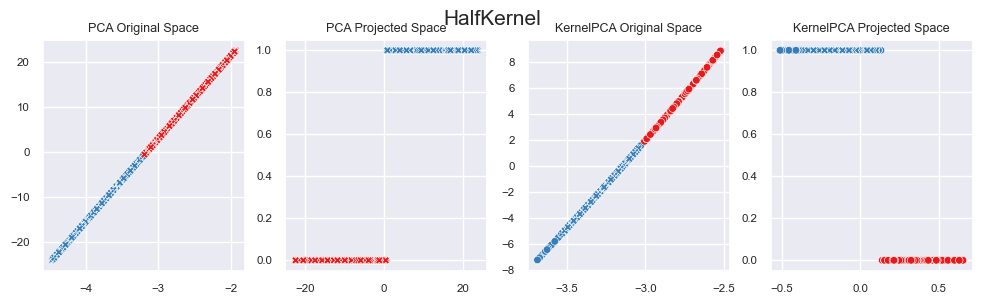

In [24]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

X_pca, y_pred, X_reconstructed, y = apply_PCA(halfkernel_df)
plot_original_space(X_reconstructed,y_pred,y, 'PCA', axs[0])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'PCA', axs[1])

X_pca, y_pred, X_reconstructed, y = apply_kernelPCA(halfkernel_df,0.02)
plot_original_space(X_reconstructed,y_pred,y,'KernelPCA', axs[2])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'KernelPCA', axs[3])

# plot3(axs[1, 0])
# plot4(axs[1, 1])
fig.suptitle('HalfKernel', fontsize=15)
# Show the plot
plt.show()

### Spiral1

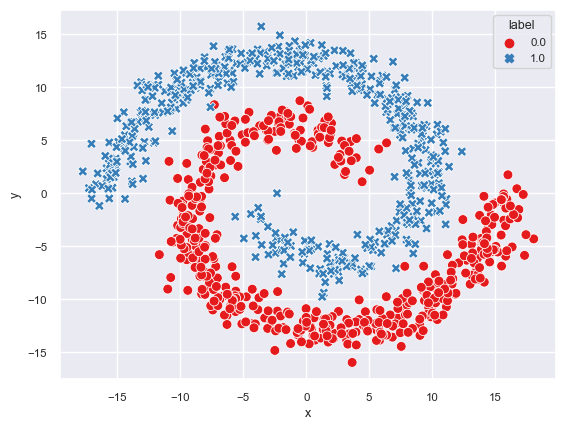

In [70]:
plot(spiral_df)

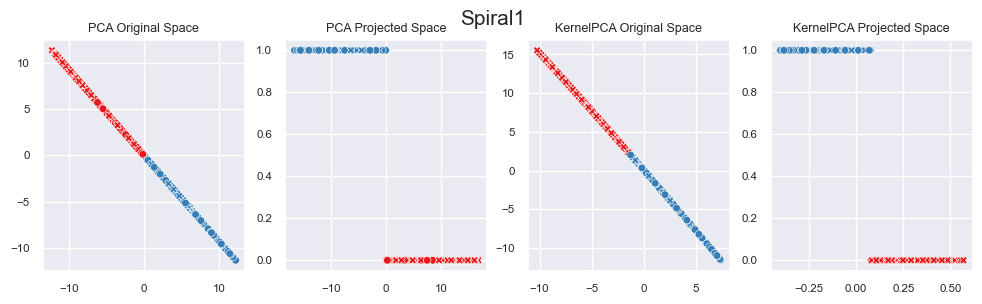

In [25]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

X_pca, y_pred, X_reconstructed, y = apply_PCA(spiral_df)
plot_original_space(X_reconstructed,y_pred,y, 'PCA', axs[0])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'PCA', axs[1])

X_pca, y_pred, X_reconstructed, y = apply_kernelPCA(spiral_df,0.081)
plot_original_space(X_reconstructed,y_pred,y,'KernelPCA', axs[2])
plot_projected_space(X_pca.to_numpy(),y_pred,y,'KernelPCA', axs[3])

# plot3(axs[1, 0])
# plot4(axs[1, 1])
fig.suptitle('Spiral1', fontsize=15)
# Show the plot
plt.show()